In [106]:
# 1 - Importar libs e dataset

import pandas as pd
import numpy as np

link = "C:/Users/CarlosViniMSouza/Documents/Projects/data-mining-ifam/database/result.csv"

dataset = pd.read_csv(link)

In [107]:
# 2 - Destinar features e coluna-alvo

featureNames = ['risk_score', 'amount_requested', 'has_debt', 'income']

X = dataset.drop(['e_signed'], axis=1)
y = dataset['e_signed']

In [108]:
# 3 - Dividindo os dados de treino e teste

from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=4)

In [109]:
# 4 - Checando proporções de treino e teste

print(f"Shape de treino: {X_train.shape}")

print(f"Shape de teste: {X_test.shape}")

Shape de treino: (14326, 17)
Shape de teste: (3582, 17)


In [110]:
# 3 - Definindo classificador (Com valores padrão)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [111]:
# 4 - TREINO

model.fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [112]:
# 6 - TESTE
from sklearn import metrics

predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)

print(accuracy)

0.5678391959798995


## Vamos testar alguns parâmetros do tipo **critério**:

1. `gini (valor padrão)`
2. `entropy`
3. `log_loss`

## E três parâmetros especifícos:

1. `max_depth`
2. `min_samples_split`
3. `splitter`

1. Do tipo critério, vamos usar o valor `entropy`

In [113]:
# Melhor resultado obtido: [max_depth=1000, min_samples_split=10]

model = DecisionTreeClassifier(
    criterion='entropy', 
    splitter="best", 
    max_depth=1000, 
    min_samples_split=10
)

In [114]:
# TREINO

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9308250732933129

In [115]:
# TESTE

predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)

print(accuracy)

0.5633724176437744


2. Do tipo critério, o `log_loss`

In [116]:
# Melhor resultado obtido: [max_depth=1000, min_samples_split=10]

model = DecisionTreeClassifier(
    criterion='log_loss', 
    splitter="best",
    max_depth=1000,
    min_samples_split=10,
)

In [117]:
# TREINO

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9294290101912607

In [118]:
# TESTE

predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)

print(accuracy)

0.5692350642099386


## Bem, agora vamos documentar e testar outros valores para comprovar que o resultado anterior foi o melhor possivel

### Mas antes, vamos deixar algumas coisas enclarecidas:

1. `max_depth` trabalhará com valores múltiplos de 100 (de 100 a 1000), 
2. `min_samples_split` trabalhará com valores múltiplos de 5 (de 5 a 50),

Com isso, o notebook poderá trabalhar mais efetivamente (*sem interferir muito na acurácia*).

1. Do tipo critério, o `entropy`

In [119]:
# Vamos até o max_depth=500 
for max_depth_loop in range(1000, 6000, 1000):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='entropy',
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(metrics.accuracy_score(y_test, predictions), 4)}")
    print("\n")

Acuracia com intervalo [1000, 10] => 0.5706
Acuracia com intervalo [1000, 20] => 0.5637
Acuracia com intervalo [1000, 30] => 0.5754
Acuracia com intervalo [1000, 40] => 0.5832
Acuracia com intervalo [1000, 50] => 0.5893


Acuracia com intervalo [2000, 10] => 0.5684
Acuracia com intervalo [2000, 20] => 0.5631
Acuracia com intervalo [2000, 30] => 0.5812
Acuracia com intervalo [2000, 40] => 0.5843
Acuracia com intervalo [2000, 50] => 0.5899


Acuracia com intervalo [3000, 10] => 0.5625
Acuracia com intervalo [3000, 20] => 0.5645
Acuracia com intervalo [3000, 30] => 0.5826
Acuracia com intervalo [3000, 40] => 0.5829
Acuracia com intervalo [3000, 50] => 0.5893


Acuracia com intervalo [4000, 10] => 0.567
Acuracia com intervalo [4000, 20] => 0.5653
Acuracia com intervalo [4000, 30] => 0.5776
Acuracia com intervalo [4000, 40] => 0.5824
Acuracia com intervalo [4000, 50] => 0.5896


Acuracia com intervalo [5000, 10] => 0.5717
Acuracia com intervalo [5000, 20] => 0.567
Acuracia com intervalo [50

In [120]:
# Vamos do max_depth=500 ao max_depth=1000
for max_depth_loop in range(600, 1100, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='entropy', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(metrics.accuracy_score(y_test, predictions), 4)}")
    print("\n")

Acuracia com intervalo [600, 10] => 0.5664
Acuracia com intervalo [600, 20] => 0.5639
Acuracia com intervalo [600, 30] => 0.5798
Acuracia com intervalo [600, 40] => 0.5801
Acuracia com intervalo [600, 50] => 0.5902


Acuracia com intervalo [700, 10] => 0.5656
Acuracia com intervalo [700, 20] => 0.5637
Acuracia com intervalo [700, 30] => 0.5754
Acuracia com intervalo [700, 40] => 0.5874
Acuracia com intervalo [700, 50] => 0.5874


Acuracia com intervalo [800, 10] => 0.5631
Acuracia com intervalo [800, 20] => 0.5681
Acuracia com intervalo [800, 30] => 0.572
Acuracia com intervalo [800, 40] => 0.5821
Acuracia com intervalo [800, 50] => 0.5899


Acuracia com intervalo [900, 10] => 0.5653
Acuracia com intervalo [900, 20] => 0.5678
Acuracia com intervalo [900, 30] => 0.5762
Acuracia com intervalo [900, 40] => 0.5843
Acuracia com intervalo [900, 50] => 0.5865


Acuracia com intervalo [1000, 10] => 0.5664
Acuracia com intervalo [1000, 20] => 0.5656
Acuracia com intervalo [1000, 30] => 0.5762
A

2. Do tipo critério, o `log_loss`

In [121]:
# Vamos até o max_depth=500
for max_depth_loop in range(100, 600, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='log_loss', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(metrics.accuracy_score(y_test, predictions), 4)}")
    print("\n")

Acuracia com intervalo [100, 10] => 0.5639
Acuracia com intervalo [100, 20] => 0.5645
Acuracia com intervalo [100, 30] => 0.5804
Acuracia com intervalo [100, 40] => 0.5846
Acuracia com intervalo [100, 50] => 0.5865


Acuracia com intervalo [200, 10] => 0.5673
Acuracia com intervalo [200, 20] => 0.5709
Acuracia com intervalo [200, 30] => 0.5754
Acuracia com intervalo [200, 40] => 0.5812
Acuracia com intervalo [200, 50] => 0.5899


Acuracia com intervalo [300, 10] => 0.5639
Acuracia com intervalo [300, 20] => 0.567
Acuracia com intervalo [300, 30] => 0.5787
Acuracia com intervalo [300, 40] => 0.584
Acuracia com intervalo [300, 50] => 0.5882


Acuracia com intervalo [400, 10] => 0.5606
Acuracia com intervalo [400, 20] => 0.5676
Acuracia com intervalo [400, 30] => 0.5779
Acuracia com intervalo [400, 40] => 0.5838
Acuracia com intervalo [400, 50] => 0.5871


Acuracia com intervalo [500, 10] => 0.5648
Acuracia com intervalo [500, 20] => 0.5662
Acuracia com intervalo [500, 30] => 0.5796
Acura

In [122]:
# Vamos do max_depth=500 ao max_depth=1000
for max_depth_loop in range(600, 1100, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='log_loss', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(metrics.accuracy_score(y_test, predictions), 4)}")
    print("\n")

Acuracia com intervalo [600, 10] => 0.5676
Acuracia com intervalo [600, 20] => 0.5617
Acuracia com intervalo [600, 30] => 0.5765
Acuracia com intervalo [600, 40] => 0.5821
Acuracia com intervalo [600, 50] => 0.5868


Acuracia com intervalo [700, 10] => 0.5673
Acuracia com intervalo [700, 20] => 0.5673
Acuracia com intervalo [700, 30] => 0.5768
Acuracia com intervalo [700, 40] => 0.581
Acuracia com intervalo [700, 50] => 0.5879


Acuracia com intervalo [800, 10] => 0.5704
Acuracia com intervalo [800, 20] => 0.5659
Acuracia com intervalo [800, 30] => 0.5754
Acuracia com intervalo [800, 40] => 0.5843
Acuracia com intervalo [800, 50] => 0.5879


Acuracia com intervalo [900, 10] => 0.5631
Acuracia com intervalo [900, 20] => 0.5664
Acuracia com intervalo [900, 30] => 0.5784
Acuracia com intervalo [900, 40] => 0.5849
Acuracia com intervalo [900, 50] => 0.5874


Acuracia com intervalo [1000, 10] => 0.5628
Acuracia com intervalo [1000, 20] => 0.5662
Acuracia com intervalo [1000, 30] => 0.5771
A

3. Do tipo critério, o `gini`

In [123]:
# Vamos até o max_depth=500
for max_depth_loop in range(100, 600, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='gini', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(metrics.accuracy_score(y_test, predictions), 4)}")
    print("\n")

Acuracia com intervalo [100, 10] => 0.5645
Acuracia com intervalo [100, 20] => 0.5695
Acuracia com intervalo [100, 30] => 0.5709
Acuracia com intervalo [100, 40] => 0.5743
Acuracia com intervalo [100, 50] => 0.5784


Acuracia com intervalo [200, 10] => 0.567
Acuracia com intervalo [200, 20] => 0.5681
Acuracia com intervalo [200, 30] => 0.5712
Acuracia com intervalo [200, 40] => 0.5748
Acuracia com intervalo [200, 50] => 0.5824


Acuracia com intervalo [300, 10] => 0.569
Acuracia com intervalo [300, 20] => 0.5743
Acuracia com intervalo [300, 30] => 0.5729
Acuracia com intervalo [300, 40] => 0.5745
Acuracia com intervalo [300, 50] => 0.5804


Acuracia com intervalo [400, 10] => 0.5634
Acuracia com intervalo [400, 20] => 0.5717
Acuracia com intervalo [400, 30] => 0.572
Acuracia com intervalo [400, 40] => 0.5765
Acuracia com intervalo [400, 50] => 0.5798


Acuracia com intervalo [500, 10] => 0.569
Acuracia com intervalo [500, 20] => 0.5723
Acuracia com intervalo [500, 30] => 0.5701
Acuraci

In [124]:
# Vamos do max_depth=500 ao max_depth=1000
for max_depth_loop in range(600, 1100, 100):
    for min_samples_loop in range(10, 60, 10):
        model = DecisionTreeClassifier(
            criterion='gini', 
            splitter="best",
            max_depth=max_depth_loop, 
            min_samples_split=min_samples_loop
        )

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        print(f"Acuracia com intervalo [{max_depth_loop}, {min_samples_loop}] => {round(metrics.accuracy_score(y_test, predictions), 4)}")
    print("\n")

Acuracia com intervalo [600, 10] => 0.5664
Acuracia com intervalo [600, 20] => 0.5695
Acuracia com intervalo [600, 30] => 0.5715
Acuracia com intervalo [600, 40] => 0.5748
Acuracia com intervalo [600, 50] => 0.581


Acuracia com intervalo [700, 10] => 0.5609
Acuracia com intervalo [700, 20] => 0.5715
Acuracia com intervalo [700, 30] => 0.5734
Acuracia com intervalo [700, 40] => 0.5751
Acuracia com intervalo [700, 50] => 0.5798


Acuracia com intervalo [800, 10] => 0.5729
Acuracia com intervalo [800, 20] => 0.5759
Acuracia com intervalo [800, 30] => 0.5701
Acuracia com intervalo [800, 40] => 0.5771
Acuracia com intervalo [800, 50] => 0.5796


Acuracia com intervalo [900, 10] => 0.5645
Acuracia com intervalo [900, 20] => 0.5706
Acuracia com intervalo [900, 30] => 0.5704
Acuracia com intervalo [900, 40] => 0.5751
Acuracia com intervalo [900, 50] => 0.5796


Acuracia com intervalo [1000, 10] => 0.5639
Acuracia com intervalo [1000, 20] => 0.5717
Acuracia com intervalo [1000, 30] => 0.5717
A

## Bem, com isso, podemos tirar algumas conclusões:

1. Conforme aumentamos o número do `min_samples_split`, menor será a acurácia.
2. O 1° resultado de cada loop é sempre o mais elevado.

Então, vamos documentar os resultados obtidos nos loops

## Resultados mais Próximos a Realidade

1. Em relação ao critério `entropy`

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 50] | 0.7713 |
| [200, 50] | 0.7703 |
| [300, 50] | 0.7715 |
| [400, 50] | 0.7706 |
| [500, 50] | 0.7703 |
| [600, 50] | 0.7705 |
| [700, 50] | 0.7708 |
| [800, 50] | 0.7706 |
| [900, 50] | 0.7715 |
| [1000, 50]| 0.7717 |

2. Em relação ao critério `log_loss`

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 50] | 0.7720 |
| [200, 50] | 0.7710 |
| [300, 50] | 0.7720 |
| [400, 50] | 0.7710 |
| [500, 50] | 0.7706 |
| [600, 50] | 0.7707 |
| [700, 50] | 0.7713 |
| [800, 50] | 0.7703 |
| [900, 50] | 0.7712 |
| [1000, 50]| 0.7710 |

3. Em relação ao critério `gini`

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 50] | 0.7571 |
| [200, 50] | 0.7574 |
| [300, 50] | 0.7589 |
| [400, 50] | 0.7593 |
| [500, 50] | 0.7576 |
| [600, 50] | 0.7590 |
| [700, 50] | 0.7575 |
| [800, 50] | 0.7590 |
| [900, 50] | 0.7591 |
| [1000, 50]| 0.7593 |

## Resultados mais Otimistas

1. Em relação ao critério `entropy`

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 10] | 0.9239 |
| [200, 10] | 0.9235 |
| [300, 10] | 0.9263 |
| [400, 10] | 0.9244 |
| [500, 10] | 0.9216 |
| [600, 10] | 0.9237 |
| [700, 10] | 0.9222 |
| [800, 10] | 0.9226 |
| [900, 10] | 0.9235 |
| [1000, 10]| 0.9241 |

2. Em relação ao critério `log_loss`

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 10] | 0.9224 |
| [200, 10] | 0.9239 |
| [300, 10] | 0.9239 |
| [400, 10] | 0.9241 |
| [500, 10] | 0.9226 |
| [600, 10] | 0.9237 |
| [700, 10] | 0.9237 |
| [800, 10] | 0.9248 |
| [900, 10] | 0.9250 |
| [1000, 10]| 0.9222 |

3. Em relação ao critério `gini`

| [max_depth, min_samples_split] | result |
|--------------------------------|--------|
| [100, 10] | 0.9144 |
| [200, 10] | 0.9149 |
| [300, 10] | 0.9144 |
| [400, 10] | 0.9146 |
| [500, 10] | 0.9146 |
| [600, 10] | 0.9153 |
| [700, 10] | 0.9149 |
| [800, 10] | 0.9148 |
| [900, 10] | 0.9149 |
| [1000, 10]| 0.9149 |

### Parte de Visualização/Plotagem dos Resultados

1. Representação do Algoritmo

2. Matrix de Confusão

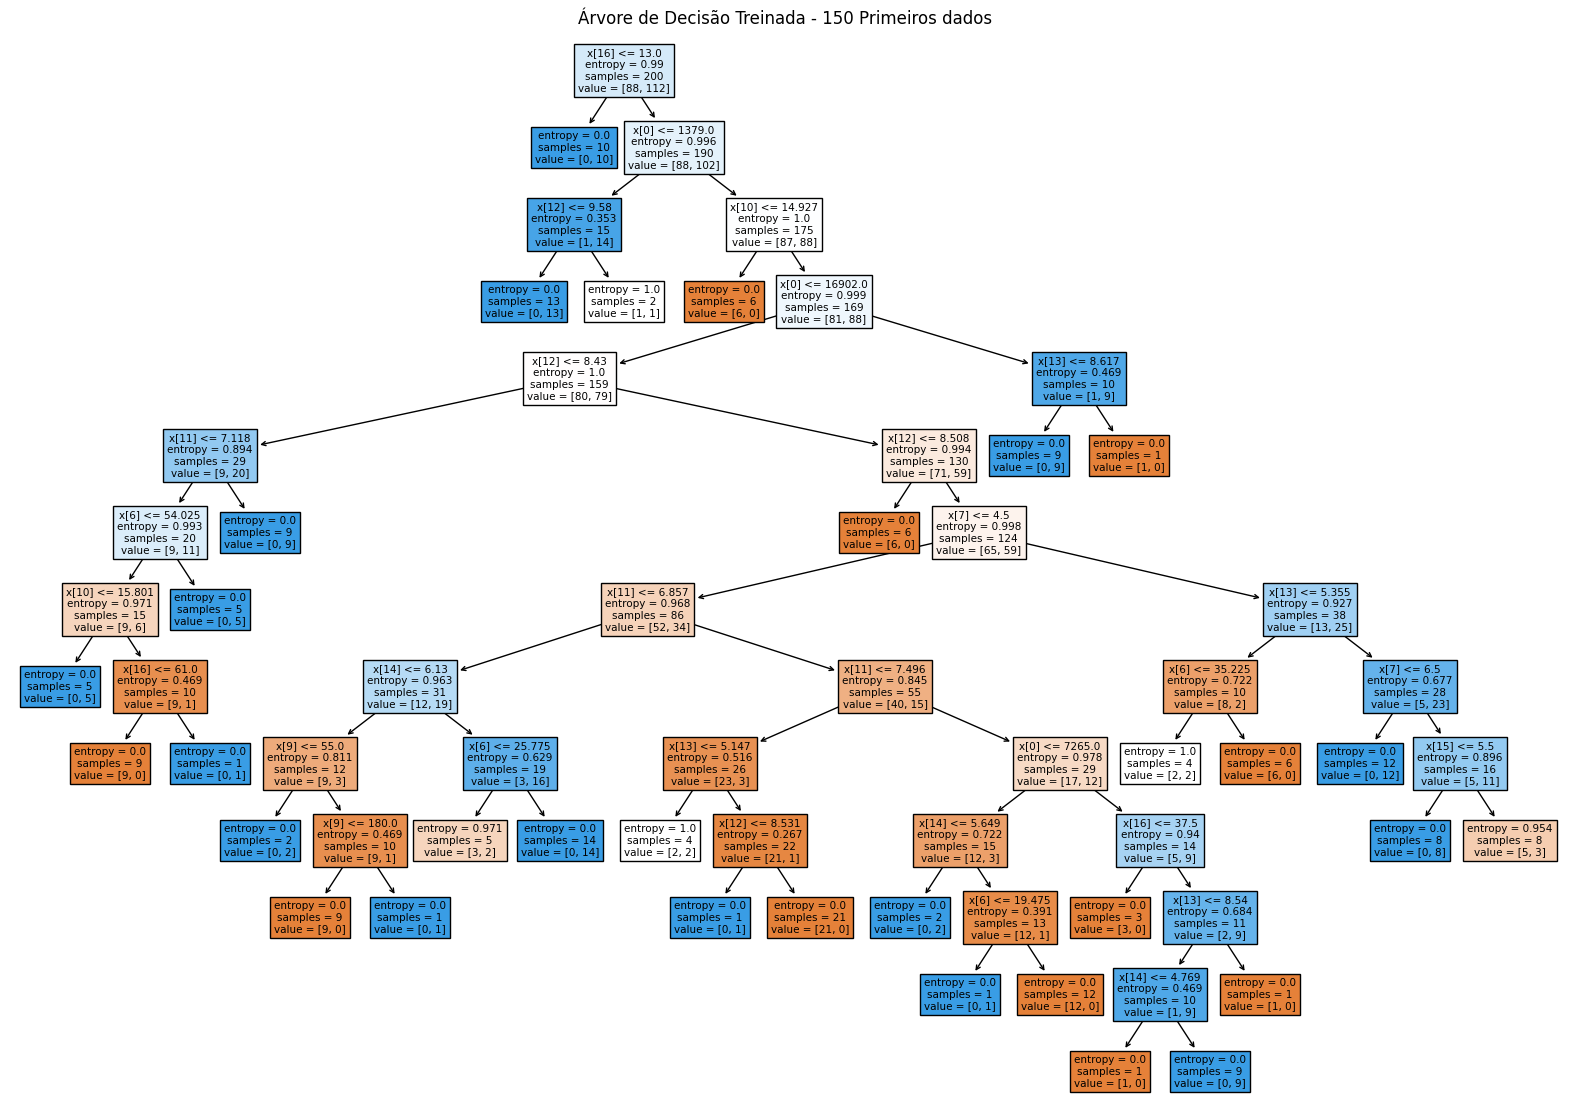

In [125]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 14))

model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=1000,
    min_samples_split=10
).fit(
    X_train[0:200], 
    y_train[0:200]
)

plot_tree(model, filled=True)

plt.title("Árvore de Decisão Treinada - 150 Primeiros dados")
plt.show()

              precision    recall  f1-score   support

           0       0.54      0.55      0.55      1637
           1       0.62      0.60      0.61      1945

    accuracy                           0.58      3582
   macro avg       0.58      0.58      0.58      3582
weighted avg       0.58      0.58      0.58      3582



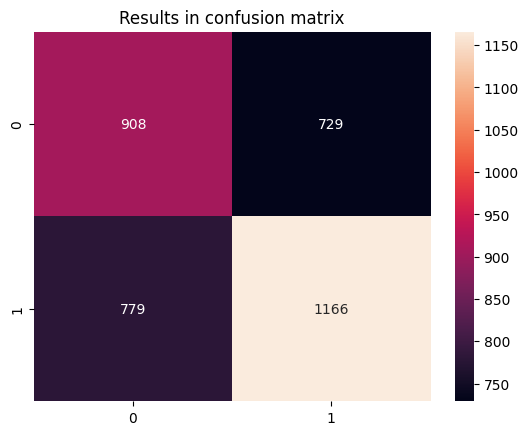

In [126]:
# 2. Matrix de Confusão

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

confMatrix = confusion_matrix(y_test, predictions)

sns \
    .heatmap(confMatrix, annot=True, fmt='d') \
    .set_title('Results in confusion matrix')

print(classification_report(y_test, predictions))

### Por fim, confira a predição do modelo melhorado

In [127]:
model = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    max_depth=1000,
    min_samples_split=10
)

model.fit(X_test, y_test)
model.score(X_test, y_test)

0.9260189838079286

In [128]:
from sklearn import metrics

y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

print(acc)

0.9260189838079286


### Basicamente, o valor do `Score de Teste` e o `Resultado da Predição` são idênticos ...

### Plotando outra matrix de confusão, para ver se ocorreu alguma alteração.

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1637
           1       0.93      0.93      0.93      1945

    accuracy                           0.93      3582
   macro avg       0.93      0.93      0.93      3582
weighted avg       0.93      0.93      0.93      3582


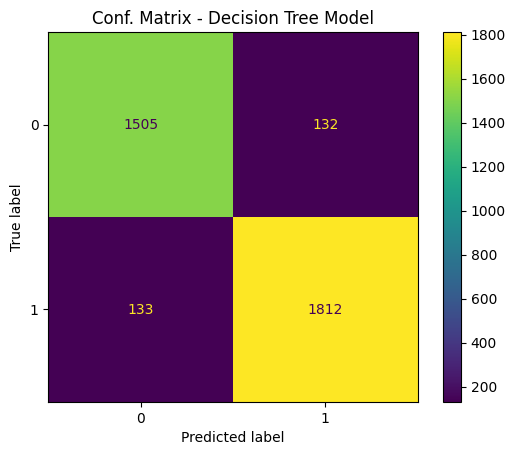

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Conf. Matrix - Decision Tree Model")

print(classification_report(y_test, y_pred))

`Fim dos Testes com Decision Tree! Vamos trabalhar com o algoritmo de Random Forest ...`